# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Run test on q3_data cleanup...
Test DataFrame created: (5, 3)
Test detect_missing: 2
Test passed!
Loaded 10000 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [2]:
# TODO: Group by site

# first, clean site names
df['site'] = df['site'].str.strip()
df['site'] = df['site'].str.lower()
df['site'] = df['site'].str.replace('_', '', regex=False)
df['site'] = df['site'].str.replace(r'\s+', ' ', regex=True)
df['site'] = df['site'].replace({
    'sited': 'site d'
})

site_summary = df.groupby('site')[['age', 'bmi', 'systolic_bp', 'diastolic_bp']].mean()
print("1. Mean values by site:")
print(site_summary)

1. Mean values by site:
              age        bmi  systolic_bp  diastolic_bp
site                                                   
site a  56.364005  25.875183   117.354284     73.549508
site b  62.401957  25.706681   117.130675     73.310140
site c  57.312108  25.789583   117.978359     73.676397
site d  63.491006  25.565682   117.943662     73.639437
site e  57.064897  25.476502   117.503080     73.752567


In [3]:
# TODO: Count by intervention group

# first, clean intervention_group values
df['intervention_group'] = df['intervention_group'].str.strip().str.lower().str.replace('_', '', regex=False).str.replace(r'\s+', ' ', regex=True)
df['intervention_group'] = df['intervention_group'].replace({
    'treatmen a': 'treatment a',
    'treatmenta': 'treatment a',
    'contrl': 'control'
})

print("Cleaned intervention_group values:\n")
print(df['intervention_group'].unique())

intervention_counts = df['intervention_group'].value_counts()
print("2. Counts by intervention group:")
print(intervention_counts)

Cleaned intervention_group values:

['control' 'treatment b' 'treatment a']
2. Counts by intervention group:
intervention_group
treatment b    3342
control        3337
treatment a    3321
Name: count, dtype: int64


**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [4]:
# TODO: Use summarize_by_group utility

# first, clean site names again
df['site'] = df['site'].str.strip()
df['site'] = df['site'].str.lower()
df['site'] = df['site'].str.replace('_', '', regex=False)
df['site'] = df['site'].str.replace(r'\s+', ' ', regex=True)
df['site'] = df['site'].replace({
    'sited': 'site d'
})

site_stats = summarize_by_group(
    df, 
    group_col = 'site', 
    agg_dict = {
        'age': ['mean', 'median', 'std', 'count'],
        'bmi': ['mean', 'median', 'std', 'count'],
        'systolic_bp': ['mean', 'median', 'std', 'count'],
        'diastolic_bp': ['mean', 'median', 'std', 'count'],
    }
    )

print("3. Overall statistics by site:")
print(site_stats)

3. Overall statistics by site:
              age                                 bmi                         \
             mean median         std count       mean median       std count   
site                                                                           
site a  56.364005   81.0  162.536292  2956  25.875183   26.1  4.983102  2873   
site b  62.401957   80.0  139.050180  2453  25.706681   26.0  5.017423  2350   
site c  57.312108   80.0  157.941868  2073  25.789583   26.1  5.417217  1968   
site d  63.491006   80.0  136.140058  1501  25.565682   26.2  5.881319  1422   
site e  57.064897   80.0  157.697644  1017  25.476502   26.0  6.084532   949   

       systolic_bp                         diastolic_bp                    \
              mean median        std count         mean median        std   
site                                                                        
site a  117.354284  117.0  14.109332  2848    73.549508   73.0  10.052567   
site b  117.130675  

## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [5]:
# TODO: Multiple aggregations

# first, clean site names again
df['site'] = df['site'].str.strip()
df['site'] = df['site'].str.lower()
df['site'] = df['site'].str.replace('_', '', regex=False)
df['site'] = df['site'].str.replace(r'\s+', ' ', regex=True)
df['site'] = df['site'].replace({
    'sited': 'site d'
})

site_stats = summarize_by_group (
    df,
    'site',
    agg_dict={
        'age':['mean', 'std', 'min', 'max'],
        'bmi':['mean', 'std'],
        'systolic_bp':['mean', 'median']
    }
)

print("Statistics by site")

print (site_stats.round(2))


# Display in a well-formatted table
display(site_stats.round(2))

print()
print("="*80)

Statistics by site
          age                      bmi       systolic_bp       
         mean     std  min  max   mean   std        mean median
site                                                           
site a  56.36  162.54 -999  100  25.88  4.98      117.35  117.0
site b  62.40  139.05 -999  100  25.71  5.02      117.13  117.0
site c  57.31  157.94 -999  100  25.79  5.42      117.98  118.0
site d  63.49  136.14 -999  100  25.57  5.88      117.94  118.0
site e  57.06  157.70 -999  100  25.48  6.08      117.50  117.0


age                      bmi       systolic_bp       
         mean     std  min  max   mean   std        mean median
site                                                           
site a  56.36  162.54 -999  100  25.88  4.98      117.35  117.0
site b  62.40  139.05 -999  100  25.71  5.02      117.13  117.0
site c  57.31  157.94 -999  100  25.79  5.42      117.98  118.0
site d  63.49  136.14 -999  100  25.57  5.88      117.94  118.0
site e  57.06  157.70 -999  100  25.48  6.08      117.50  117.0

## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [6]:
# TODO: Intervention group comparisons

# first, clean intervention_group again
df['intervention_group'] = df['intervention_group'].str.strip().str.lower().str.replace('_', '', regex=False).str.replace(r'\s+', ' ', regex=True)

# Convert CVD outcome to numeric
df['outcome_cvd'] = pd.to_numeric(df['outcome_cvd'], errors = 'coerce')
print("1. Mean CVD outcome rate by intervention group:")
cvd_by_group = df.groupby('intervention_group')['outcome_cvd'].value_counts()
print(cvd_by_group.round(4))
print()

print("2. Mean adherence percentage by intervention group:")
adherence_by_group = df.groupby('intervention_group')['adherence_pct'].mean()
print(adherence_by_group.round(2))
print()

print("3. Cross-tabulation of intervention group vs. droupout status:")
crosstab = pd.crosstab(df['intervention_group'], df['dropout'], margins = True)
print(crosstab)
print()

print("Dropout rates by group:")
dropout_rates = pd.crosstab(df['intervention_group'], df['dropout'])
dropout_rates = pd.crosstab(df['intervention_group'], df['dropout'], normalize='index') * 100
print(dropout_rates.round(2))
print()

1. Mean CVD outcome rate by intervention group:
Series([], Name: count, dtype: int64)

2. Mean adherence percentage by intervention group:
intervention_group
control        60.62
treatment a    60.21
treatment b    61.01
Name: adherence_pct, dtype: float64

3. Cross-tabulation of intervention group vs. droupout status:
dropout               No   Yes    All
intervention_group                   
control             2831   506   3337
treatment a         2831   490   3321
treatment b         2871   471   3342
All                 8533  1467  10000

Dropout rates by group:
dropout                No    Yes
intervention_group              
control             84.84  15.16
treatment a         85.25  14.75
treatment b         85.91  14.09



Cleaned intervention groups: ['control' 'treatment b' 'treatment a']

Converting outcome_cvd to numeric

Calculate group statistics...

CVD by group:
intervention_group
control       NaN
treatment a   NaN
treatment b   NaN
Name: outcome_cvd, dtype: float64

Adherence by group:
intervention_group
control        60.621688
treatment a    60.210173
treatment b    61.009404
Name: adherence_pct, dtype: float64

Dropout rates (%):
intervention_group
control        15.163320
treatment a    14.754592
treatment b    14.093357
Name: dropout, dtype: float64

Dropout rates (%):

intervention_group
control        15.163320
treatment a    14.754592
treatment b    14.093357
Name: dropout, dtype: float64



Visualization saved to output/intervention_comparison.png


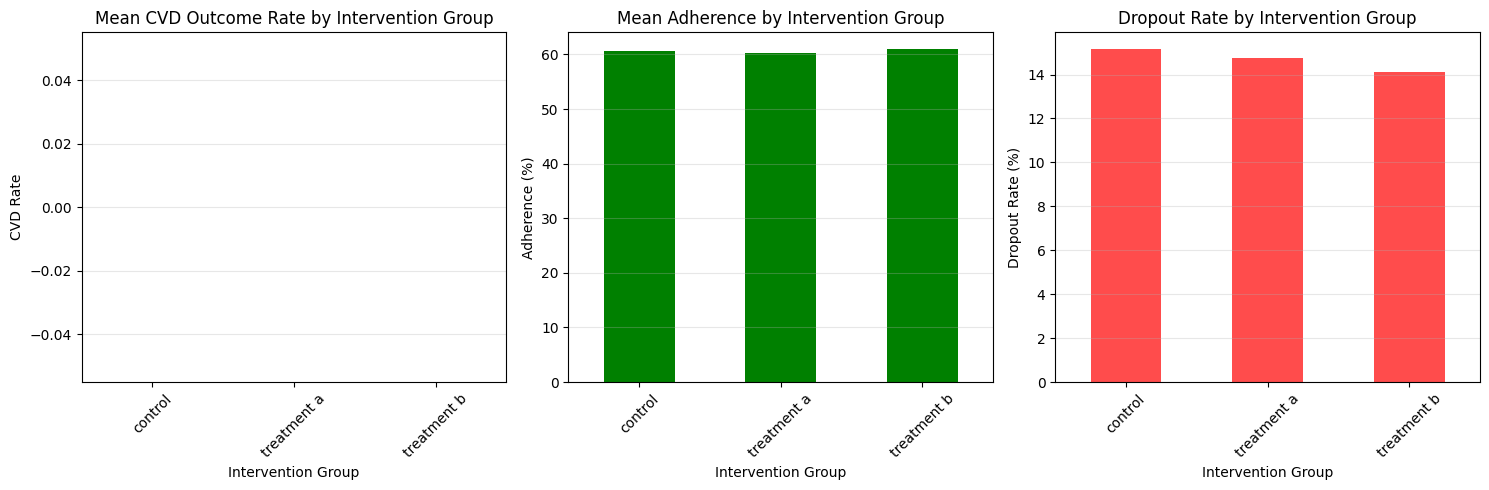

In [7]:
# TODO: Visualization

# Clean intervention groups first again
df['intervention_group'] = df['intervention_group'].str.strip().str.lower().str.replace('_', '', regex=False).str.replace(r'\s+', ' ', regex=True)


print("Cleaned intervention groups:", df['intervention_group'].unique())
print()

# Convert outcome_cvd to numeric
print("Converting outcome_cvd to numeric")
if df['outcome_cvd'].dtype == 'object':
    df['outcome_cvd'] = df['outcome_cvd'].map({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0})
print()

# Convert adherence to numeric
df['adherence_pct'] = pd.to_numeric(df['adherence_pct'], errors='coerce')

# Convert dropout to numeric
if df['dropout'].dtype == 'object':
    df['dropout'] = df['dropout'].map({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0})
    
print("Calculate group statistics...")
cvd_by_group = df.groupby('intervention_group')['outcome_cvd'].mean()
adherence_by_group = df.groupby('intervention_group')['adherence_pct'].mean()
dropout_rates_plot = df.groupby('intervention_group')['dropout'].mean() * 100

print("\nCVD by group:")
print(cvd_by_group)
print("\nAdherence by group:")
print(adherence_by_group)
print("\nDropout rates (%):")
print(dropout_rates_plot)
print()


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: CVD outcome rate
cvd_by_group.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Mean CVD Outcome Rate by Intervention Group')
axes[0].set_xlabel('Intervention Group')
axes[0].set_ylabel('CVD Rate')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Adherence percentage
adherence_by_group.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Mean Adherence by Intervention Group')
axes[1].set_xlabel('Intervention Group')
axes[1].set_ylabel('Adherence (%)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Plot 3: Dropout rate
dropout_rates_plot = df.groupby('intervention_group')['dropout'].mean() * 100

print("Dropout rates (%):\n")
print(dropout_rates_plot)
print()

dropout_rates_plot.plot(kind='bar', ax=axes[2], color='red', alpha=0.7)
axes[2].set_title('Dropout Rate by Intervention Group')
axes[2].set_xlabel('Intervention Group')
axes[2].set_ylabel('Dropout Rate (%)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('output/intervention_comparison.png', dpi=300, bbox_inches='tight')
print("Visualization saved to output/intervention_comparison.png")
plt.show()

## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [8]:
# TODO: Save summary outputs
print("1. Site summary:")
site_stats.to_csv('output/q7_site_summary.csv')
print("Site summary saved to output/q7_site_summary.csv")

print("2. Intervention group CVD comparison")
cvd_by_group.to_csv('output/q7_intervention_comparison.csv')
print("Intervention group CVD comparison saved to output/q7_intervention_comparison.csv")

with open('output/q7_analysis_report.txt', 'w') as f:
    f.write("="*80 + "\n")
    f.write("3. Text report with key findings\n")
    f.write("="*80 + "\n\n")
    
    # 1. Site summary
    f.write("1. Mean values by site\n")
    f.write(site_summary.round(2).to_string())
    f.write("\n\n")
    
    # 2. Intervention Counts
    f.write("2. Intervention Counts\n")
    f.write(intervention_counts.round(2).to_string())
    f.write("\n\n")
    
    # 3. Site statistics
    f.write("3. Age, BMI, systolic BP by Site\n")
    f.write(site_stats.round(2).to_string())
    f.write("\n\n")
    
    # 4. Cardiovascular disease by group
    f.write("4. Cardiovascular disease by group\n")
    f.write(cvd_by_group.round(2).to_string())
    f.write("\n\n")
    
    # 5. Adherence by group
    f.write("5. Adherence by group\n")
    f.write(adherence_by_group.round(2).to_string())
    f.write("\n\n")  
    
    # 6. Intervention group vs. droupout status
    f.write("6. Intervention group vs. dropout status\n")
    f.write(crosstab.round(2).to_string())
    f.write("\n\n")
    
    # 7. Dropout rates by group
    f.write("7. Dropout rates by group\n")
    f.write(dropout_rates.round(2).to_string())
    f.write("\n\n")

print("3. Text report with key findings generated and saved to output/q7_analysis_report.txt")  

1. Site summary:
Site summary saved to output/q7_site_summary.csv
2. Intervention group CVD comparison
Intervention group CVD comparison saved to output/q7_intervention_comparison.csv
3. Text report with key findings generated and saved to output/q7_analysis_report.txt


## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. It would be WAY easier to start analysis with a cleaned dataset. We ran analyses on the raw data and had to clean each variable before each analysis.
2. Data is so messy! It is often difficult to visualize all of the inconsistencies in data input. 
3. It's very important to remember and spell the names of your variables correctly. 
